# Manual for Numpy, Scipy, and Matplotlib
This manual was created as a final project for CMPT 399 (Numerical Methods). It is intended for general scientists who have a mathematical background but may have little to no programming experience.

## Installation
Python packages are easy to install using the built in package manager. First make sure you have installed python and an IDE of your choice. Then open the command prompt and enter the following command:

`python -m pip install --user numpy scipy matplotlib`

This will install the packages used in this manual.

Before you can use the packages in python code, you will have to import them.

In [0]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

## Arrays and Matrices
The `np.ndarray` data type can be used to represent both vectors and matrices of any shape.  
For example, suppose we have the following vectors and matrices:

$$
A=\begin{bmatrix} 4 & 2 &-1 \\ 3 & 4 & 5 \\ -2 & 0 & 1 \end{bmatrix},\ \
B=\begin{bmatrix} 0 & 1 & 0 \\ 0 & 0 & 1 \\ 1 & 0 & 0 \end{bmatrix},\ \
v=\begin{bmatrix} -1 \\ 2 \\ 1 \end{bmatrix},\ \
u=\begin{bmatrix} 0 \\ -3 \\ 5 \end{bmatrix}
$$

We can construct these with the following python code:


In [0]:
A = np.array([
    [4, 2, -1],
    [3, 4, 5],
    [-2, 0, 1]
])

B = np.array([
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0]
])

v = np.array([-1, 2, 1])
u = np.array([0, -3, 5])

Some other useful methods for constructing matrices and vectors.


In [0]:
K1 = np.ones((3, 4))                  # A 3x4 matrix of 1s
K2 = np.zeros((3, 2))                 # A 3x2 matrix of 0s
K3 = np.full((3, 3), 5)               # A 3x3 matrix of 5s
K4 = np.diag(np.array([2, 0, -1]))    # Constructs a 3x3 matrix with a diagonal of [2, 0, -1] and 0s elsewhere
v1 = np.diag(A)                       # Gets the diagonal of matrix A: [4, 4, 1]

Linear operations between matrices, vectors, and scalar values are well supported.

In [5]:
# Matrix-matrix multiplication
C = A @ B 
print(C)

# Subtract 4 off the diagonal
C = C - np.identity(3) * 4
print(C)

[[-1  4  2]
 [ 5  3  4]
 [ 1 -2  0]]
[[-5.  4.  2.]
 [ 5. -1.  4.]
 [ 1. -2. -4.]]


In [6]:
print(A @ v)  # Matrix-vector multiplication
print(B * 2)   # Matrix-scalar multiplication
print(v * 4)  # Vector-scalar multiplication

[-1 10  3]
[[0 2 0]
 [0 0 2]
 [2 0 0]]
[-4  8  4]


You may sometimes wish to construct a large matrix with values that follow a particular pattern, but has a variable size. For example the matrix

$$
\begin{bmatrix}
-1 & -2 & 0 & \dots  & \dots & 0\\ 
-4  & 1 & 2 & \ddots & & \vdots \\ 
0 & 4 & 1 & 2 & \ddots & \vdots \\
\vdots & \ddots  & \ddots & \ddots & \ddots & 0\\ 
\vdots &  & \ddots & 4 & 1 & 2\\ 
0 & \dots & \dots & 0 & 4 & -1
\end{bmatrix}
$$

is called a banded matrix. It has non-zero values on the main, upper, and lower diagonals, and is zero elsewhere.

In [7]:
n = 8 # desired size of the matrix

# Since most of the matrix is 0, we start off with n X n matrix of 0s
G = np.zeros((n, n)) 

# We can set the unique values directly using [row][column] indexing

# Upper left corner
G[0][0] = -1
G[0][1] = -2
G[1][0] = -4

# Bottom right corner
G[n-1][n-1] = -1

# Values on the diagonal
# i will take on values of 1, 2, ... , n-2
for i in range(1, n-1):
    G[i][i] = 1     # Main diagonal
    G[i][i+1] = 2   # Upper diagonal
    G[i+1][i] = 4   # Lower Diagonal

print(G)

[[-1. -2.  0.  0.  0.  0.  0.  0.]
 [-4.  1.  2.  0.  0.  0.  0.  0.]
 [ 0.  4.  1.  2.  0.  0.  0.  0.]
 [ 0.  0.  4.  1.  2.  0.  0.  0.]
 [ 0.  0.  0.  4.  1.  2.  0.  0.]
 [ 0.  0.  0.  0.  4.  1.  2.  0.]
 [ 0.  0.  0.  0.  0.  4.  1.  2.]
 [ 0.  0.  0.  0.  0.  0.  4. -1.]]


We can also easily compute the transpose or inverse of a matrix.

In [8]:
print(G.transpose())
print(np.linalg.inv(A))

[[-1. -4.  0.  0.  0.  0.  0.  0.]
 [-2.  1.  4.  0.  0.  0.  0.  0.]
 [ 0.  2.  1.  4.  0.  0.  0.  0.]
 [ 0.  0.  2.  1.  4.  0.  0.  0.]
 [ 0.  0.  0.  2.  1.  4.  0.  0.]
 [ 0.  0.  0.  0.  2.  1.  4.  0.]
 [ 0.  0.  0.  0.  0.  2.  1.  4.]
 [ 0.  0.  0.  0.  0.  0.  2. -1.]]
[[-0.22222222  0.11111111 -0.77777778]
 [ 0.72222222 -0.11111111  1.27777778]
 [-0.44444444  0.22222222 -0.55555556]]


## Systems of Linear Equations
From linear algebra we know that we can represent a system of $n$ equations in $n$ variables as the matrix equation $Ax = b$ where $A$ is a $n \times n$ matrix of variable coefficients, $b$ is a n-vector of constants, and $x$ is an unknown n-vector. By solving the system for the vector $x$, we obtain the solution to the system. For example, consider the following system where $n=5$:

$$
\begin{cases}
x_1 + 2x_2 - x_5 = 1 \\
4x_2 + 2x_3 - 5x_4 + 3x_5 = 0 \\
-6x_3 + 2x_5 = 3 \\
3x_2 - x_3 + 4x_4  = -5 \\
-x_1 + 3x_2 - 6x_3 = 7
\end{cases}
\quad \implies \quad
Ax =
\begin{bmatrix} 
1 & 2 & 0 & 0 & -1 \\ 
0 & 4 & 2 & -5 & 3 \\ 
0 & 0 & -6 & 0 & 2 \\
0 & 3 & -1 & 4 & 0 \\
-1 & 3 & -6 & 0 & 0
\end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \end{bmatrix}
=
\begin{bmatrix} 1 \\ 0 \\ 3 \\ -5 \\ 7 \end{bmatrix}
=b
$$

To solve the system using numpy, we construct the matrix $A$ and vector $b$ and pass them to the solver.

In [14]:
A = np.array([
    [1, 2, 0, 0, -1],
    [0, 4, 2, -5, 3],
    [0, 0, -6, 0, 2],
    [0, 3, -1, 4, 0],
    [-1, 3, -6, 0, 0]
])
b = np.array([1, 0, 3, -5, 7])
x = np.linalg.solve(A, b)
print(x)

[-0.65506329 -0.03481013 -1.07489451 -1.49261603 -1.72468354]


We can often exploit the shape of a linear system to obtain a more efficient solver. For example consider the banded matrix from above.

$$
\begin{bmatrix}
-1 & -2 & 0 & \dots  & \dots & 0\\ 
-4  & 1 & 2 & \ddots & & \vdots \\ 
0 & 4 & 1 & 2 & \ddots & \vdots \\
\vdots & \ddots  & \ddots & \ddots & \ddots & 0\\ 
\vdots &  & \ddots & 4 & 1 & 2\\ 
0 & \dots & \dots & 0 & 4 & -1
\end{bmatrix}
$$

The majority of elements in this matrix are 0. The banded solver saves on space by only storing the values in a non-zero band.

$$
\begin{bmatrix}
0 & -2 & 2 & 2 & \dots & 2 \\
-1 & 1 & 1 & 1 & \dots & 1 \\
-4 & 4 & 4 & 4 & \dots & 0 
\end{bmatrix}
$$

Rows that are not the main diagonal contain $<n$ elements. So the banded solver will expect some elements in the top left and bottom right of our matrix to be 0.

In [60]:
# The width of our band is 3
A_banded = np.zeros((3, n))
b = np.ones(n)

A_banded[0][1] = -2
A_banded[1][0] = -1
A_banded[1][n-1] = -1
A_banded[2][0] = -4

for i in range(1, n-1):
    A_banded[1][i] = 1

for i in range(2, n):
    A_banded[0][i] = 2

for i in range(1, n-1):
    A_banded[2][i] = 4

x = linalg.solve_banded((1, 1), A_banded, b)

# Check if the results agree!
print(x)
print(linalg.solve(G, b))

[-0.38287304 -0.30856348 -0.11146434  1.17285913  0.13649911 -1.91396781
  1.18398569  3.73594278]
[-0.38287304 -0.30856348 -0.11146434  1.17285913  0.13649911 -1.91396781
  1.18398569  3.73594278]


## Linear Least Squares
A system of equations that has more equations than variables is overdetermined and has no exact solution. Such a system is better represented by the equation $Ax \approx b$. The desired **least squares** solution $x$ is the vector which minimizes the length of the **residual vector** $r = b - Ax$. There are a number of ways to solve a least squares problem. One convenient method is to compute a pseudo-inverse $A^+$. A pseudo-inverse has many similar properties to a regular inverse matrix $A^{-1}$, but unlike an inverse matrix the pseudo-inverse exists for non-square matrices. The formula for the pseudo-inverse is defined as $A^+=(A^TA)^{-1}A^T$. Then the least squares solution of $Ax \approx b$ is given by $x = A^+b$.

In [0]:
# An overdetermined system of equations:
A = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [1, -1, 0, 0],
    [1, 0, -1, 0],
    [1, 0, 0, -1],
    [0, 1, -1, 0],
    [0, 1, 0, -1],
    [0, 0, 1, -1]
])
b = np.array([2.95, 1.74, -1.45, 1.32, 1.23, 4.45, 1.61, 3.21, 0.45, -2.75])

# Psuedo-inverse:
Ap = np.linalg.inv(A.transpose() @ A) @ A.transpose()
# Or just use the built in:
# Ap = np.linalg.pinv(A)

# Solving least squares problem
x = Ap @ b

# Again, numpy offers a built in that does everything for us with some extras:
# x, residuals, rank, singularities = np.linalg.lstsq(A, b)

One pratical application of linear least squares is polynomial fitting. Suppose we wish to fit a cubic polynomial to the following data set.

| x | 0.1 | 0.2 | 0.3 | 0.4 | 0.5 | 0.6  | 0.7 | 0.8 | 0.9 | 1.0 |
|---|-----|-----|-----|-----|-----|------|-----|-----|-----|-----|
| y | 0.3 | 0.1 | 0.5 | 0.4 | 0.6 | 0.75 | 0.9 | 1.2 | 1.3 | 0.9 |

So we wish to find the constants $a_1, a_2, a_3, a_4$ to the cubic polynomial $y = a_1 x^3+a_2x^2+a_3x+a_4$ such that the polynomial passes the closest it can to all of the points in our data set. This yields an overdetermined system of equations as follows.

$$
\begin{cases}
y_1 = a_1 x_1^3+a_2x_1^2+a_3x_1+a_4 \\
y_2 = a_1 x_2^3+a_2x_2^2+a_3x_2+a_4 \\
\dots\dots\dots\dots\dots\dots\dots\dots\dots\dots \\
y_{10} = a_1 x_{10}^3+a_2x_{10}^2+a_3x_{10}+a_4
\end{cases}
\quad \implies \quad
Aa =
\begin{bmatrix} 
x_1^3 & x_1^2 & x_1 & 1 \\
x_2^3 & x_2^2 & x_2 & 1 \\
\dots & \dots & \dots & \dots\\
x_{10}^3 & x_{10}^2 & x_{10} & 1 \\
\end{bmatrix}
\begin{bmatrix} a_1 \\ a_2 \\ a_3 \\ a_4 \end{bmatrix}
=
\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_{10} \end{bmatrix}
=y
$$


In [50]:
x = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
y = np.array([0.3, 0.1, 0.5, 0.4, 0.6, 0.75, 0.9, 1.2, 1.3, 0.9])

# Populate the A matrix
A = np.ones((x.size, 4))
for i in range(x.size):
    A[i][0] = x[i] ** 3
    A[i][1] = x[i] ** 2
    A[i][2] = x[i]

a = np.linalg.pinv(A) @ y
print(a)

# Once again, numpy offers a built in function that does this for us
# a = np.polyfit(x, y, 4)

[-6.48795649 10.32634033 -3.37218337  0.53666667]


## Basic Plotting
We can plot the points and polynomial fitting function from the previous example with the matplotlib package.

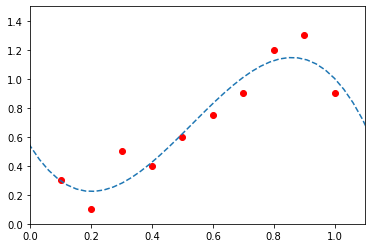

In [51]:
# Creates an array of 100 sample points in the range [-1, 2]
sample_points = np.linspace(-1, 2, 100)

# Numpy provides a built-in function that returns a polynomial function built from our coefficients
poly_func = np.poly1d(a)

# Set the horizontal range of our plot to [0, 1.1] and the vertical range to [0, 1.5]
plt.axis([0, 1.1, 0, 1.5])

plt.plot(x, y, 'ro') # data points as red circles
plt.plot(sample_points, poly_func(sample_points), '--') # polynomial as a blue dashed line
plt.show() # Show the final plot

## Fast Fourier Transform
A fast fourier transform is an algorithm that can convert a discrete time domain signal to a discrete frequency domain signal.  
First, lets build our time domain signal.

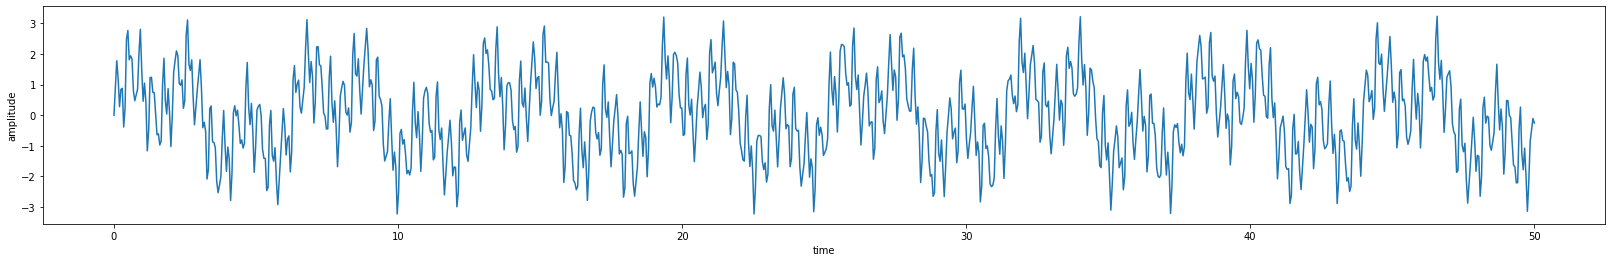

In [113]:
# Number of data points in the signal
N = 1024

# Signal is a sum of arbitrary sin waves
x = np.linspace(0, 50, N)
y = np.sin(x) + np.sin(3*x) + np.sin(15*x) + 0.5*np.sin(30*x) + 0.25 * 2*np.sin(90*x)

# Plot it
plt.figure(figsize=(28, 4))
plt.xlabel("time") 
plt.ylabel("amplitude") 
plt.plot(x, y)
plt.show()

The plot lets us view the amplitude of the signal at a particular point in time.
The FFT will allow us to observe which frequencies were present and how prominent they were over the entire duration of the signal.



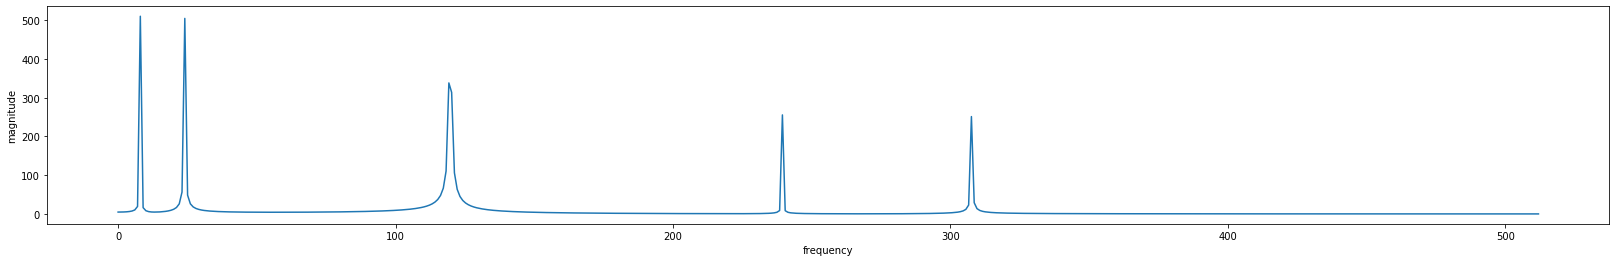

In [115]:
# Get the fft
fft = np.fft.fft(y)

# The fft of a real value signal will usually be complex
# The magnitude of the DFT is more useful for visualizations
fft_magnitude = np.abs(fft)

# The first and second half of the fft are complex-conjugates
# So the magnitudes will be the same, so we only need to use the first half.
halfN = N//2
fft_magnitude = fft_magnitude[0:halfN]

# The nyquist frequency is the largest frequency that can be represented in the FFT
nyquist = N / 2

plt.figure(figsize=(28, 4))
plt.xlabel("frequency") 
plt.ylabel("magnitude") 
plt.plot(np.linspace(0, nyquist, halfN), fft_magnitude)

plt.show()